In [ ]:
import sys
import os
sys.path.append(os.path.abspath('../src'))
sys.path.append(os.path.abspath('../Dataset'))
sys.path.append(os.path.abspath('..'))

In [ ]:
import importlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from func_preprocesamiento import preprocesar_binarios, procesar_antiguedad, preprocesar_categoricos

In [2]:
dev_df = pd.read_csv('../Dataset/dev.csv')

train_dataset, val_dataset = train_test_split(dev_df, train_size=0.2, random_state=42)
X_train = train_dataset.drop(columns=['precio_pesos_constantes'])
y_train = train_dataset['precio_pesos_constantes']

/tmp/ipykernel_365694/2484474097.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  dev_df = pd.read_csv('../Dataset/dev.csv')


In [35]:
dev_df = pd.read_csv('../Dataset/dev.csv')

columna = ['ITE_ADD_CITY_NAME', 'ITE_ADD_STATE_NAME', 'ITE_ADD_NEIGHBORHOOD_NAME']
X_train = preprocesar_categoricos(X_train, columna)


In [4]:
columna = 'Antiguedad'
df_pr_antig = procesar_antiguedad(X_train)
print(df_pr_antig[columna].value_counts())

Antiguedad
0       19570
40       3033
10       2428
50       1892
5        1682
        ...  
105         1
2017        1
2009        1
2002        1
98          1
Name: count, Length: 153, dtype: int64


In [5]:
columna = 'Amoblado'
print(X_train[columna])
print(X_train['Amoblado'].value_counts())

73778      No
83752      No
81714       0
171550      0
189337      0
         ... 
119879     No
103694     No
131932    NaN
146867      0
121958      0
Name: Amoblado, Length: 47383, dtype: object
Amoblado
No      19961
0       12446
0.0      5360
Sí       2319
1.0       776
   0      610
1         437
Name: count, dtype: int64


In [6]:
#O: 38377 + 5474 FALTANTES = 43851
col_binarias_np = ['Amoblado']
col_binarias_imp = ['Amoblado']
binario_procesado = preprocesar_binarios(X_train, ['Amoblado'], 'RF')
#print(binario_procesado['Amoblado'].value_counts())

Vector real: [0. 1. 0. ... 0. 0. 0.]
Vector predicho: [0. 1. 0. ... 0. 0. 0.]
RMSE: 0.27329975745967033


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


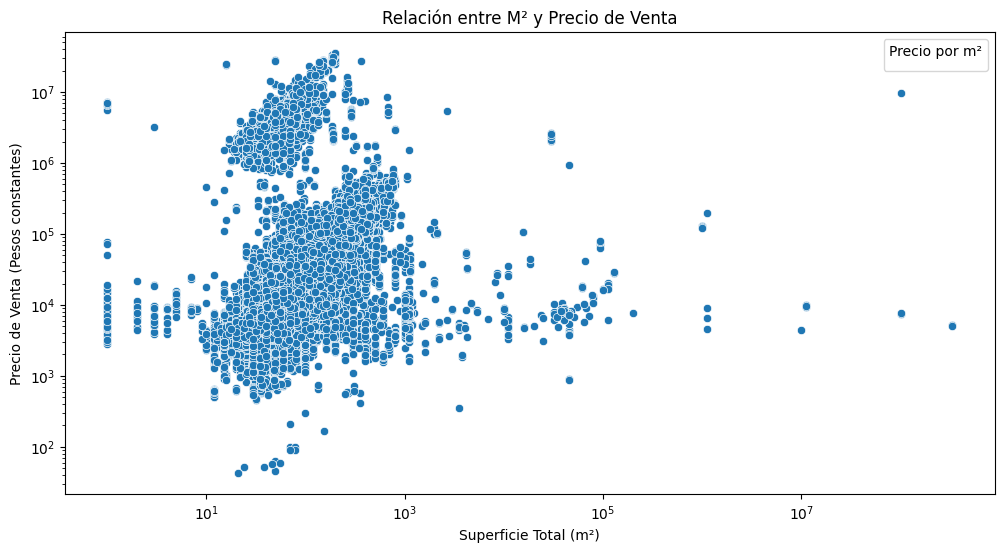

In [36]:
import seaborn as sns

plt.figure(figsize=(12, 6))

sns.scatterplot(data=dev_df, x='STotalM2', y='precio_pesos_constantes')

plt.xscale('log')  
plt.yscale('log')  

# Etiquetas y título
plt.xlabel('Superficie Total (m²)')
plt.ylabel('Precio de Venta (Pesos constantes)')
plt.title('Relación entre M² y Precio de Venta')
plt.legend(title='Precio por m²', loc='upper right')

# Mostrar gráfico
plt.show()


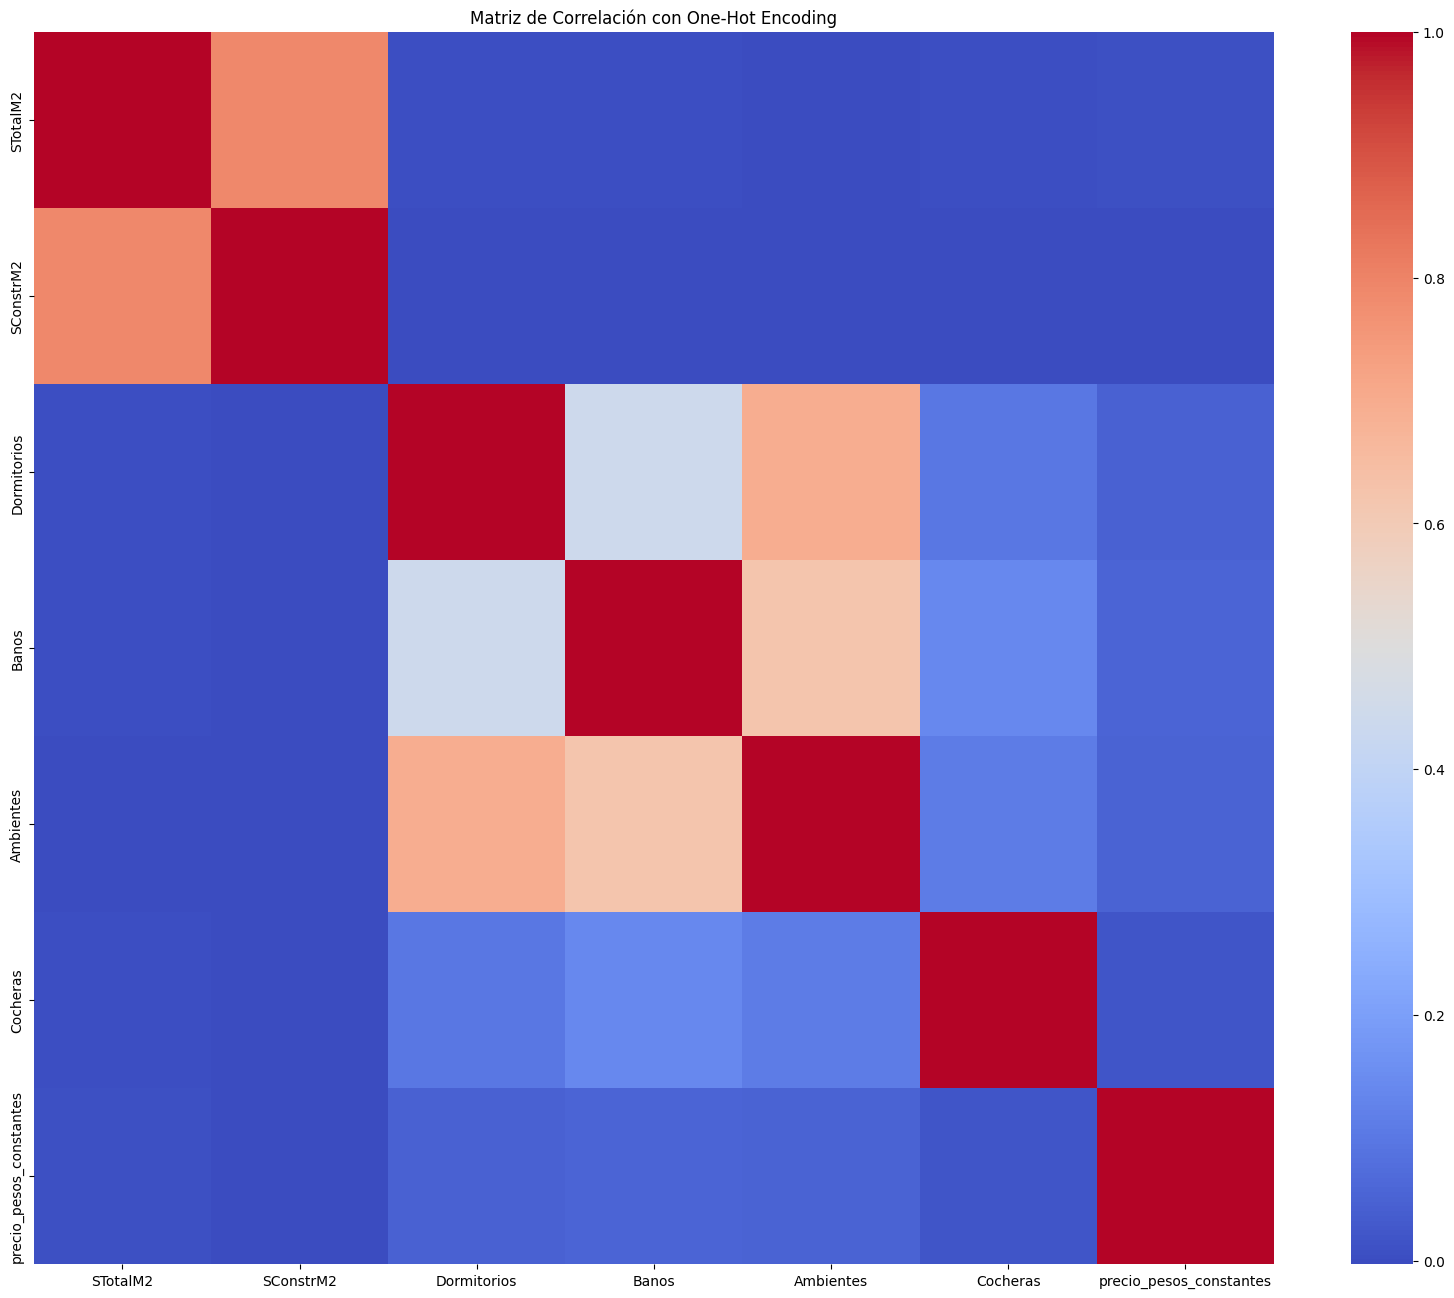

In [37]:
relevant_columns = ["STotalM2", "SConstrM2", "Dormitorios", "Banos", "Ambientes", "Cocheras", "precio_pesos_constantes"]

filtered_df = dev_df.drop(columns=["id_grid", "MesListing", "TIPOPROPIEDAD"])
filtered_df.dropna(subset=["precio_pesos_constantes"])
encoded_df = pd.get_dummies(filtered_df[relevant_columns], drop_first=True)

correlation_matrix = encoded_df.corr()
[]
# Graficar la matriz de correlación
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=False, fmt=".2f", cmap="coolwarm", cbar=True)

# Título del gráfico
plt.title("Matriz de Correlación con One-Hot Encoding")
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

print(f"Valores faltantes restantes: {dev_df['ITE_ADD_NEIGHBORHOOD_NAME'].isnull().sum()}")

# Seleccionar las columnas necesarias
columns = ["ITE_ADD_NEIGHBORHOOD_NAME", "LONGITUDE", "LATITUDE"]
df_subset = filtered_df[columns]

# Separar datos completos e incompletos
complete_rows = df_subset.dropna(subset=["ITE_ADD_NEIGHBORHOOD_NAME"])
missing_rows = df_subset[df_subset["ITE_ADD_NEIGHBORHOOD_NAME"].isna()]

# Codificar el nombre del barrio (label encoding)
le = LabelEncoder()
complete_rows["encoded_neighborhood"] = le.fit_transform(complete_rows["ITE_ADD_NEIGHBORHOOD_NAME"])

# Definir características (X) y target (y) para el entrenamiento
X_train = complete_rows[["LONGITUDE", "LATITUDE"]]
y_train = complete_rows["encoded_neighborhood"]

tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

X_missing = missing_rows[["LONGITUDE", "LATITUDE"]]
missing_rows["encoded_neighborhood"] = tree_model.predict(X_missing)

missing_rows["ITE_ADD_NEIGHBORHOOD_NAME"] = le.inverse_transform(missing_rows["encoded_neighborhood"])

# Reunir los datos nuevamente
filled_df = pd.concat([complete_rows, missing_rows]).drop(columns=["encoded_neighborhood"])

# Verificar si hay valores faltantes restantes
print(f"Valores faltantes restantes: {filled_df['ITE_ADD_NEIGHBORHOOD_NAME'].isnull().sum()}")


Valores faltantes restantes: 11081


/tmp/ipykernel_6364/1669464625.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complete_rows["encoded_neighborhood"] = le.fit_transform(complete_rows["ITE_ADD_NEIGHBORHOOD_NAME"])


Valores faltantes restantes: 0


/tmp/ipykernel_6364/1669464625.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_rows["encoded_neighborhood"] = tree_model.predict(X_missing)
/tmp/ipykernel_6364/1669464625.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_rows["ITE_ADD_NEIGHBORHOOD_NAME"] = le.inverse_transform(missing_rows["encoded_neighborhood"])


In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(tree_model, feature_names=["LONGITUDE", "LATITUDE"], class_names=le.classes_, filled=True)
plt.title("Árbol de Decisión para Predecir Neighborhood")
plt.show()

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/ciror/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3577, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_6364/4261170586.py", line 5, in <module>
    plot_tree(tree_model, feature_names=["LONGITUDE", "LATITUDE"], class_names=le.classes_, filled=True)
  File "/home/ciror/.local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 214, in wrapper
    return func(*args, **kwargs)
  File "/home/ciror/.local/lib/python3.10/site-packages/sklearn/tree/_export.py", line 211, in plot_tree
    return exporter.export(decision_tree, ax=ax)
  File "/home/ciror/.local/lib/python3.10/site-packages/sklearn/tree/_export.py", line 664, in export
    ann.update_bbox_position_size(renderer)
  File "/home/ciror/.local/lib/python3.10/site-packages/matplotlib/text.py", line 575, in update_bbox_position_size
    x_box, y_box, w_box, h_box = _get_textbox(self, renderer)
  F